# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, February 1, 2017

## Logistic Regression 

### Key Points
SETUP: We have a set of data points $\{(x_{1}, y_{1}), (x_{2}, y_{2}), ... , (x_{n}, y_{n})\}$, where $x_{i} \in R^{d}$ are the feature vectors and $y_{i} \in \{0, 1\}$ are the class labels.

MODEL: $p_{+} = p(y = 1|x) = \frac{1}{1 + e^{-w.x + b}}$, where $w, b \in R^{d}$

DISTANCE FUNCTION: -$(y * log(p_{+}) + (1 - y) * log(1 - p_{+}))$

LEARNING RULE: $w \leftarrow w - \eta * (\hat{y} - y) * x$

In [1]:
%matplotlib inline

import numpy
import matplotlib.pyplot as plot

import matplotlib
#matplotlib.rc('text', usetex=True)

In [2]:
numpy.random.seed(1234)

## 1. Data Preparation

In [3]:
from sklearn.datasets import make_blobs

In [4]:
# Sample dataset preparation

n_dim = 2
x_train, y_train = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)
x_test, y_test = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)

## 2. Model Definition

In [5]:
'''
Sigmoid function.

INPUT: A scalar/vector
OUTPUT: A value between (0, 1) for each input component
'''

def sigmoid(a):
    return 1. / (1. + numpy.exp(-a))

In [6]:
'''
Definition of the logistic regression model.

INPUT: Feature vector (x) and weight vector (w)
OUTPUT: The probability of each data point belonging to the positive class.
'''

def logreg(x, w, pre=False):
    x = x.reshape([1, -1]) if len(x.shape) < 2 else x
    
    y = numpy.sum(x * w[None,:-1], axis=1) + w[-1]
    if pre:
        return y    
    return sigmoid(y)

In [7]:
'''
Distance function of the logistic regression model (popularly called likelihood). 

INPUT: True labels (y), feature vector (x) and weight vector (w)
OUTPUT: Log of the likelihood for the given 'w'
'''

def logreg_dist(y, x, w, avg=False):
    y_ = logreg(x, w)
    
    d = -(y * numpy.log(y_) + (1. - y) * numpy.log(1-y_))
    
    if not avg:
        return d
    return numpy.mean(d)

In [8]:
'''
Learning rule for the logistic regression model.

INPUT: True labels (y), feature vector (x) and weight vector (w)
OUTPUT: The direction of update for the weight vector
'''

def logreg_rule(y, x, w):
    y_ = logreg(x, w)
    dw = numpy.zeros(w.shape)
    dw[:-1] = numpy.mean((y_ - y)[:, None] * x, axis=0)
    dw[-1] = numpy.mean(y_ - y)
    return dw

## 3. Learning Process

In [9]:
# Initializing the weight vector randomly
w0 = numpy.random.randn(n_dim+1); w0[-1] = 0.
w = numpy.copy(w0)

n_iter = 1000
eta = .1   # Learning rate
old_cost = numpy.Inf

for ni in range(n_iter):
    pred_y = logreg(x_train, w)
    
    w -= eta * logreg_rule(y_train, x_train, w)    # Updating the weight vector
    
    cost = logreg_dist(y_train, x_train, w, avg=True)
    
    if numpy.mod(ni, 50) == 0:
        print('Logistic regression cost {} after iteration {}'.format(cost, ni))
    if cost < 1e-16 or cost / old_cost >= 1.:
        print('Converged')
        break
    old_cost = cost

Logistic regression cost 1.79922069659 after iteration 0
Logistic regression cost 0.213981646044 after iteration 50
Logistic regression cost 0.154806493555 after iteration 100
Logistic regression cost 0.132914798479 after iteration 150
Logistic regression cost 0.120953876643 after iteration 200
Logistic regression cost 0.113261389884 after iteration 250
Logistic regression cost 0.107849163862 after iteration 300
Logistic regression cost 0.10381791185 after iteration 350
Logistic regression cost 0.100694092576 after iteration 400
Logistic regression cost 0.0982016932815 after iteration 450
Logistic regression cost 0.0961677268696 after iteration 500
Logistic regression cost 0.0944777173887 after iteration 550
Logistic regression cost 0.0930526376375 after iteration 600
Logistic regression cost 0.0918360534356 after iteration 650
Logistic regression cost 0.0907865297248 after iteration 700
Logistic regression cost 0.0898729289835 after iteration 750
Logistic regression cost 0.08907138502

In [10]:
print('Initial: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w0)))
print('Final: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w)))

Initial: 0.9 x_1 + 0.75 x_2 + 0.0 = 0
Final: -3.4 x_1 + -1.7 x_2 + 0.36 = 0


## 4. Visualize Final Model

In [11]:
# visualize data 
def vis_data(x, y = None, c='r', open_figure=False):
    if open_figure:
        plot.figure()
    if y is None: 
        y = [None] * len(x)
    plot.hold('on')
    for x_, y_ in zip(x, y):
        if y_ is None:
            plot.plot(x_[0], x_[1], 'o', markerfacecolor='none', markeredgecolor=c)
        else:
            plot.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
    plot.hold('off')
    plot.grid('on')

In [12]:
def vis_hyperplane(w, typ='k--'):
    plot.hold('on')

    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    m0, m1 = lim0[0], lim0[1]

    intercept0 = -(w[0] * m0 + w[-1])/w[1]
    intercept1 = -(w[0] * m1 + w[-1])/w[1]
    
    plt1, = plot.plot([m0, m1], [intercept0, intercept1], typ)

    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    plot.hold('off')
    
    return plt1

In [13]:
def vis_decision_boundary_contour(w, typ='k--'):
    plot.hold('on')
    
    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    
    x_ = numpy.linspace(lim0[0], lim0[1], 100)
    y_ = numpy.linspace(lim1[0], lim1[1], 100)
    xx, yy = numpy.meshgrid(x_, y_)
    
    x_tra_ = numpy.concatenate([xx.ravel()[:,None], yy.ravel()[:,None]], axis=1)
    
    pred = logreg(x_tra_, w)
    plt1 = plot.contourf(xx, yy, pred.reshape(xx.shape), cmap=plot.cm.coolwarm, alpha=0.4)
    
    plot.colorbar(plt1)
    
    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    plot.hold('off')
    
    return plt1

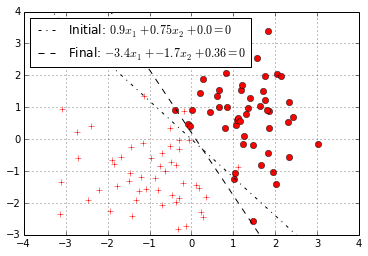

In [14]:
plot.figure()

vis_data(x_train, y_train, c='r')

plt0 = vis_hyperplane(w0, 'k-.')
plt1 = vis_hyperplane(w, 'k--')
plot.legend([plt0, plt1], [
        'Initial: ${:.2} x_1 + {:.2} x_2 + {:.2} = 0$'.format(*list(w0)),
        'Final: ${:.2} x_1 + {:.2} x_2 + {:.2} = 0$'.format(*list(w))],
           loc='best')

plot.show()

<matplotlib.contour.QuadContourSet instance at 0x7f81a011b518>

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


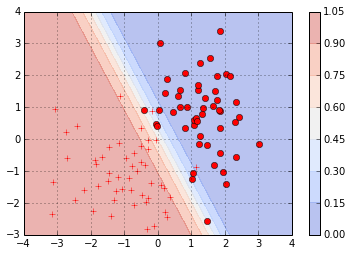

In [15]:
vis_data(x_train, y_train, c= 'r', open_figure=True)
vis_decision_boundary_contour(w)

## 5. Testing

/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


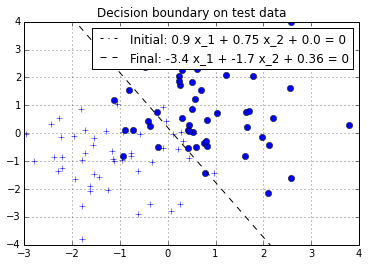

In [16]:
# Decision boundary on test data

plot.figure()

vis_data(x_test, y_test, 'b')

plt1 = vis_hyperplane(w, 'k--')

plot.legend([plt0, plt1], [
        'Initial: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w0)),
        'Final: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w))],
           loc='upper right')

plot.legend(fontsize = 20, loc = 'best')
plot.title('Decision boundary on test data')
plot.show()

In [17]:
train_error = numpy.sum(numpy.abs(numpy.round(logreg(x_train, w)) - y_train)) / numpy.float(len(y_train))
test_error = numpy.sum(numpy.abs(numpy.round(logreg(x_test, w)) - y_test)) / numpy.float(len(y_test))

print('Training error rate {}, Test error rate {}'.format(train_error, test_error))

Training error rate 0.03, Test error rate 0.14


## 6. HOMEWORK - Use scikit-learn to replicate the above operations

In [18]:
# Use this cell to import required packages of sklearn
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# STEP 1: Create a Logistic Regression class instance
log_reg = LogisticRegression()

In [20]:
# STEP 2: Fit the logistic regression model to the training data
#augment training data with 1's
#x_tilde = np.insert(x_train,2,1,axis=1)
log_reg.fit(x_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [21]:
# STEP 3: Obtain the coefficients of the learned model (read the documentation to find out how)
coeff = log_reg.coef_
coeff = np.insert(coeff,2,log_reg.intercept_)

In [22]:
# STEP 4: Compare the feature coefficients obtained by sklearn and the custom module we have
print "Custom feature coefficients are %f, %f, %f"%(w[0],w[1],w[2])
print "Sklearn feature coefficients are %f, %f, %f"%(coeff[0],coeff[1],coeff[2])

# Note: Print the equations of the model learned by both implementations and comment about what you observe.
print "The custom module equation is %.2fx + %.2fy + %.2f = 0"%(w[0],w[1],w[2])
print "The sklearn module equation is %.2fx + %.2fy + %.2f = 0"%(coeff[0],coeff[1],coeff[2])


Custom feature coefficients are -3.416818, -1.738157, 0.357653
Sklearn feature coefficients are -2.462385, -1.308711, 0.236050
The custom module equation is -3.42x + -1.74y + 0.36 = 0
The sklearn module equation is -2.46x + -1.31y + 0.24 = 0


TRAINING SCORE IS 0.97
TEST SCORE IS 0.85


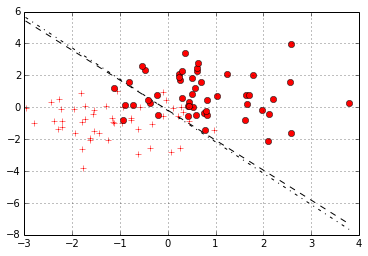

In [23]:
# STEP 5: Predict the class of test data points. Print the TRAINING and TEST accuracy.
pred = log_reg.predict(x_test)

print "TRAINING SCORE IS %.2f"%log_reg.score(x_train, y_train)
print "TEST SCORE IS %.2f"%log_reg.score(x_test, y_test)

x = np.arange(np.amin(x_test[:,0]),np.amax(x_test[:,0]),0.001)
sk_mod = (-coeff[0]/coeff[1])*x + (coeff[2]/coeff[1])
cust_mod = (-w[0]/w[1])*x + (w[2]/w[1])
plt.plot(x,sk_mod,'k--',x,cust_mod,'k-.')
vis_data(x_test,y_test)